In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

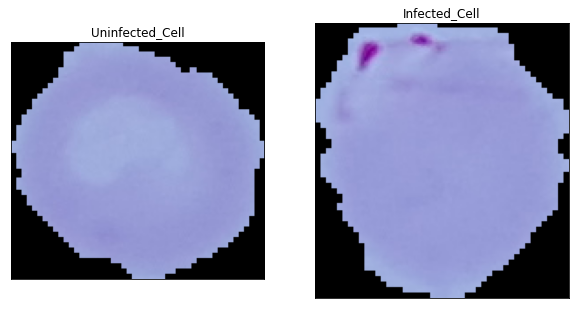

In [3]:
import cv2
uninfected_image='../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
infected_image='../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (10 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(uninfected_image))
plt.title('Uninfected_Cell')
plt.xticks([]) , plt.yticks([])
plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(infected_image))
plt.title('Infected_Cell')
plt.xticks([]) , plt.yticks([])
plt.show()

In [4]:
width = 128
height = 128
datagen=ImageDataGenerator(rescale=1/255,validation_split=0.3)

In [5]:
train_set = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'categorical',
                                           batch_size = 16,
                                           subset='training')

Found 19292 images belonging to 2 classes.


In [6]:
val = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'categorical',
                                           batch_size = 16,
                                           subset='validation')

Found 8266 images belonging to 2 classes.


In [15]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 63, 63, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 64)       

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(monitor='val_loss',patience=5,mode='min', restore_best_weights=True)

In [19]:
history = model.fit_generator(generator = train_set,
                             steps_per_epoch = len(train_set)//16,
                              epochs =40,
                              validation_data = val,
                              validation_steps=len(val)//16,callbacks=[early_stop])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
75/75 [==============================] - 6s 68ms/step - loss: 0.7192 - accuracy: 0.5207 - val_loss: 0.6931 - val_accuracy: 0.5039
Epoch 2/40
75/75 [==============================] - 5s 62ms/step - loss: 0.6938 - accuracy: 0.5062 - val_loss: 0.6884 - val_accuracy: 0.5449
Epoch 3/40
75/75 [==============================] - 5s 64ms/step - loss: 0.6945 - accuracy: 0.5145 - val_loss: 0.6889 - val_accuracy: 0.5879
Epoch 4/40
75/75 [==============================] - 5s 60ms/step - loss: 0.6804 - accuracy: 0.5685 - val_loss: 0.6930 - val_accuracy: 0.4980
Epoch 5/40
75/75 [==============================] - 5s 63ms/step - loss: 0.6912 - accuracy: 0.5323 - val_loss: 0.6917 - val_accuracy: 0.5410
Epoch 6/40
75/75 [==============================] - 4s 58ms/step - loss: 0.6905 - accuracy: 0.5142 - val_loss: 0.6296 - val_accuracy: 0.8008
Epoch 7/40
75/75 [==============================] - 4s 57ms/step - loss: 0.5998 - accuracy: 0.7370 - val_loss: 0.5264 - val_accuracy: 0.9199
Epoch 8/40
75

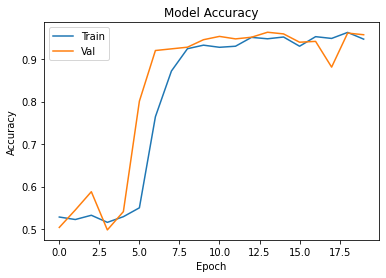

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

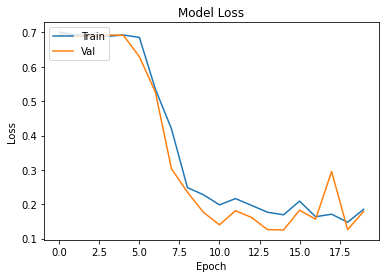

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [48]:
score = model.evaluate_generator(val,len(val))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [49]:
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

Accuracy: 94.65%
Loss:  0.16040022671222687
